In [27]:
import cv2
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [45]:
#　画像一覧
Berry = cv2.imread('src/Berry.jpg')
Lena = cv2.imread('src/Lena.jpg')
Grapes = cv2.imread('src/grapes.jpg')
Floor = cv2.imread('src/floor.jpg', 0)

Lena_gray = cv2.imread('src/Lena.jpg', 0)

In [5]:
#画像の情報
Berry.shape
#　高さ、幅、画素数

(589, 960, 3)

In [ ]:
#　画像の表示・出力

In [29]:
#　第1：画像の名前、第2：画像
def imshow(img_name, img):
    cv2.imshow(img_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [7]:
imshow('Berry', Berry)

In [8]:
#　outputディレクトリに出力
#　第1：どこになんというファイル、第2：画像
cv2.imwrite('output/berry.jpg', Berry)

True

In [ ]:
#動画の表示・出力

In [11]:
cap = cv2.VideoCapture('movie/Cosmos.mp4')
if cap.isOpened() == False:
    sys.exit()
ret, frame = cap.read()
h, w = frame.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*'XVID')
dst = cv2.VideoWriter('output/test.avi', fourcc, 30.0, (w, h))

while True:
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imshow('img', frame)
    dst.write(frame)
    if cv2.waitKey(30) == 27:
        break
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

In [12]:
# ウィンドウの調整

In [6]:
# windowの設定を決めることができる　　　　　　　　これはデフォルト
cv2.namedWindow('window', cv2.WINDOW_AUTOSIZE)
imshow('window', Lena)

In [7]:
# windowにがぞうがめいっぱいに広がる
cv2.namedWindow('window', cv2.WINDOW_NORMAL)
imshow('window', Lena)

In [8]:
# resizeWindowで指定した解像度で画像を出力する
cv2.namedWindow('window', cv2.WINDOW_NORMAL)
cv2.resizeWindow('window', 640, 480)
imshow('window', Lena)

In [9]:
# リサイズ

In [11]:
size = (300, 200)#幅、高さ　（shapeとは逆になっていることに注意）
Grapes_resize = cv2.resize(Grapes, size)
Grapes_resize.shape

(200, 300, 3)

In [12]:
imshow('Grapes_resize', Grapes_resize)

In [14]:
# area　 自然に仕上がる コチラの方が優れてる？
Grapes_area = cv2.resize(Grapes, size, interpolation = cv2.INTER_AREA)
#　linear ちかちかする　デフォルトの設定はINTER_LINEAR
Grapes_linear = cv2.resize(Grapes, size, interpolation = cv2.INTER_LINEAR)
cv2.imshow('area', Grapes_area)
cv2.imshow('linear', Grapes_linear)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [16]:
# 色空間・グレースケール
# RGB以外にもHSVなど様々な色の表し方がある

In [30]:
# グレースケール
Grapes_gray = cv2.cvtColor(Grapes, cv2.COLOR_BGR2GRAY)
# HSVであらわす
Grapes_hsv = cv2.cvtColor(Grapes, cv2.COLOR_BGR2HSV)

print(Grapes_gray.shape)
print(Grapes_hsv.shape)

(640, 960)
(640, 960, 3)


In [21]:
imshow('gray', Grapes_gray)

In [22]:
imshow('hsv', Grapes_hsv)

In [23]:
# 取得する時にグレースケールに変換する方法
Grapes_gray2 = cv2.imread('src/grapes.jpg', 0)
imshow('gray2', Grapes_gray2)

In [ ]:
# ヒストグラム

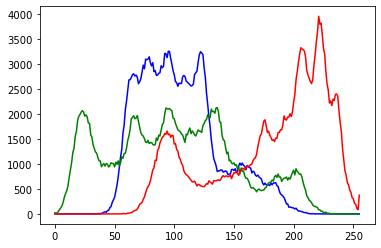

In [25]:
#　それぞれの画素がどの量なのか（右が多く左が少ない）　　　どこから読み込んでのかがわからない
color_list = ['blue', 'green', 'red']
for i,j in enumerate(color_list):
    hist = cv2.calcHist([Lena],[i], None, [256], [0,256])
    plt.plot(hist, color = j)

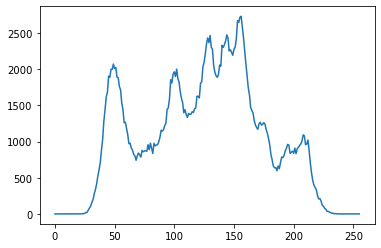

In [27]:
# グレースケールの場合（画素一種）
#左が暗く、右が明るい
# Lena_gray = cv2.imread('src/Lena.jpg', 0)
hist2 = cv2.calcHist([Lena_gray], [0], None, [256], [0,256])
plt.plot(hist2)

In [28]:
# ヒストグラム均一化

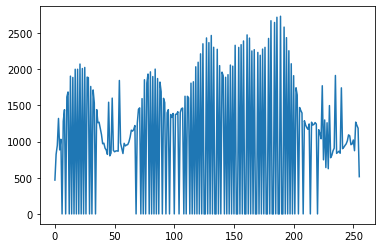

In [29]:
# 均一化　明暗をはっきりさせる　明るいのか暗いのかの二択みたいな感じ
Lena_eq = cv2.equalizeHist(Lena_gray)
hist_e = cv2.calcHist([Lena_eq], [0], None, [256], [0,256])
plt.plot(hist_e)

In [31]:
cv2.imshow('Lena', Lena_gray)
cv2.imshow('img_eq', Lena_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [32]:
# ガンマ変換

In [35]:
# ガンマが1より小さい時暗くなる　　　　　　　ガンマが1より大きい時明るくなる
gamma = 1.5
gamma_cvt = np.zeros((256,1), dtype=np.uint8)
for i in range(256):
    gamma_cvt[i][0] = 255 * (float(i)/255) ** (1.0 / gamma)
    
Berry_gamma = cv2.LUT(Berry, gamma_cvt)

In [ ]:
print(np.zeros((6,3), dtype=np.uint8))

In [36]:
cv2.imshow('Berry', Berry)
cv2.imshow('Berry_gamma', Berry_gamma)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [39]:
gamma = 0.4
gamma_cvt = np.zeros((256,1), dtype=np.uint8)
for i in range(256):
    gamma_cvt[i][0] = 255 * (float(i)/255) ** (1.0 / gamma)
    
Berry_gamma2 = cv2.LUT(Berry, gamma_cvt)

In [40]:
cv2.imshow('Berry_gamma', Berry_gamma)
cv2.imshow('Berry_gamma2', Berry_gamma2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
# トラックバーの作成

In [ ]:
def onTrackbar(position):
    global trackValue
    trackValue = position
    
trackValue = 100
cv2.namedWindow('img')
cv2.createTrackbar('track', 'img', trackValue, 255, onTrackbar)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
# マウスイベント

In [ ]:
def print_position(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print(x,y)
img = np.zeros((512,512), np.uint8)
cv2.namedWindow('img')
cv2.setMouseCallback('img', print_position)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
# 図形の描画・文字の記述

In [ ]:
#　np.ones第1：個数　第2：行数　第3：列数
img = np.ones((500,500,3), dtype=np.uint8) * 255

#線を描く　　　　　第1：画像、第2：（始点、終点）、第3：色、第4線の太さ
cv2.line(img, (0,0), (150,190), (255,0,0), 2)
#四角形を描く 対角の点を与える(第2と第3)
cv2.rectangle(img, (100,25), (500,500), (0,255,0), 4)
#円を描く  第2：中心、第3：半径、第4：種類
cv2.circle(img, (100,100), 55, (0,0,255), -1)
#楕円を描く　　　　第2：中心、第3：比率（横、縦）、第4：傾ける角度、第5：何度描くか、第6：色、第7：太さ
cv2.ellipse(img, (250,250), (100,50), 20, 0, 360, (255,0,0), 1)
#折線を描く False=始点と終点を結ばない（多角形にしない） 色　太さ
pts = np.array([[100,30], [200,30], [200,80], [100,50]])
cv2.polylines(img, [pts], False, (100,255,0), 3)
#テキストを記述     第1：画像、第2：テキスト、第3：座標、第4：フォント、第5：、putText第7：文字の太さ、第8：テキストが美しくなる
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (100,300), font, 1, (0,255,0), 3, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
# np.onesの説明
print(np.ones((3,2,5),dtype=np.uint8)* 20)

In [ ]:
# 2値化

In [35]:
# 自分でthreshold(閾値)を決める
threshold = 100
ret, Grapes_th = cv2.threshold(Grapes, threshold, 255, cv2.THRESH_BINARY)

In [32]:
ret

100.0

In [19]:
imshow('Grapes_th', Grapes_th)

In [38]:
# OTSUは下の式から自動でthresholdを決める
img = cv2.imread('src/grapes.jpg', 0)
ret2, img_o = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

In [39]:
ret2

121.0

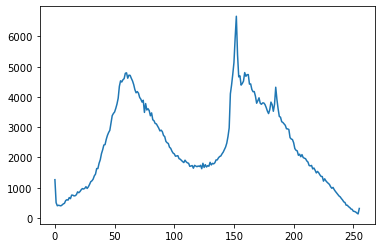

In [40]:
#shresholdをこの下の式から自動で求めてくれる
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

In [41]:
imshow('img', img)

In [43]:
#それぞれの領域でシュレ種ホールドを設定　かげがあるがぞうに役に立つ
img_ada = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 1)

In [44]:
cv2.imshow('img_o', img_o)
cv2.imshow('img_ada', img_ada)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [42]:
# 2値化　＋　トラックバー

In [46]:
imshow('Floor', Floor)

In [ ]:
def onTrackbar(position):
    global threshold
    threshold = position

cv2.namedWindow('img')
threshold = 100
cv2.createTrackbar('track', 'img', threshold, 255, onTrackbar)
while True:
#    ret, img_th = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
                                                                                          #窓の大きさ（枠）
    Floor_th = cv2.adaptiveThreshold(Floor, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, threshold)
    cv2.imshow('img', Floor_th)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()
cv2.waitKey(1)